# Builidng and backtesting the JP Morgan Volatility Index (VIX) based Strategy

Buy:    the first period where the VIX index > 1.5x its 1 month moving average

More information:
<br>Strategy - https://www.quantifiedstrategies.com/jp-morgan-vix-buy-signal-trading-strategy/#:~:text=The%20JP%20Morgan%20VIX%20buy%20signal%20is%20a%20popular%20bullish,its%201%2Dmonth%20moving%20average 
<br>VIX - https://www.cboe.com/tradable_products/vix/

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset 
import numpy as np
import yfinance as yf

In [2]:
#import relevant data
vix_df = yf.download('^VIX')
snp_df= yf.download('^GSPC')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Find signals
1) Find the periods where vix > 1.5 its 30day moving average 
2) Filter it for where signals are at least a month apart
    <br>signal can trigger multiple times in a month which isn't ideal)

In [3]:
vix_df['MA'] =vix_df['Close'].rolling('30D').mean() #set up the 1 month moving average column in the data frame
vix_df

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0,17.715000
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0,18.216667
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0,18.690000
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0,19.004000
...,...,...,...,...,...,...,...
2024-07-22,16.790001,16.889999,14.750000,14.910000,14.910000,0,13.174000
2024-07-23,15.210000,15.350000,13.900000,14.720000,14.720000,0,13.247619
2024-07-24,15.350000,18.459999,15.180000,18.040001,18.040001,0,13.471905


In [4]:
#now finding the periods where the buy signal was triggered. 
vix_df_filtered = vix_df[vix_df['Close'] >= 1.5*vix_df['MA']]
vix_df_filtered                                   #the signal can be triggered on consecutive days were the vix was high so filter this by only buy signals that are 1 month apart

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1990-08-07,32.750000,32.750000,32.750000,32.750000,32.750000,0,20.895000
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
...,...,...,...,...,...,...,...
2020-03-19,80.620003,84.260002,68.570000,72.000000,72.000000,0,44.842273
2021-01-27,23.820000,37.209999,23.709999,37.209999,37.209999,0,23.929500
2021-11-26,26.620001,28.990000,23.879999,28.620001,28.620001,0,17.673810


In [5]:
pd.Series(vix_df_filtered.index).diff() #take the index (i.e. dates) of the filterd df and find the difference between them
signals = pd.Series(vix_df_filtered.index).diff() /np.timedelta64(1,'D') >= 30 
# why a divide sign to turn the date diff to float values?

signals[0] = True                           #change the first to a true as it is the first buy signals
signals

0      True
1     False
2      True
3      True
4      True
      ...  
60    False
61     True
62     True
63    False
64     True
Name: Date, Length: 65, dtype: bool

In [6]:
buys = vix_df_filtered[signals.values] #values as signals vix_df_filtered dont havve the same index
buys

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
2007-02-27,12.120000,19.010000,12.100000,18.309999,18.309999,0,10.921905
2008-09-17,31.959999,36.400002,30.250000,36.220001,36.220001,0,23.478095
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2011-08-04,24.570000,32.070000,24.309999,31.660000,31.660000,0,20.732273
2014-10-13,21.160000,24.639999,20.520000,24.639999,24.639999,0,15.625714


In [7]:
buys.shape  #it has been triggered 21 times on record
buys[-1:]   #this was the last day 

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
2022-01-25,32.290001,35.849998,29.129999,31.16,31.16,0,20.733333


## Found the trade signals. Now observe SNP500 returns following them 

In [8]:
returns = []

for i in range(len(buys)):
    subdf = snp_df[(snp_df.index >= buys.index[i]) & (snp_df.index <= buys.index[i] + DateOffset(months =6))]
    returns.append((subdf['Close'].pct_change()+1).prod())

returns = pd.Series(returns, index = buys.index)
returns

Date
1990-08-06    1.070687
1994-04-04    1.035701
1997-10-30    1.230247
2001-09-17    1.122635
2007-02-27    1.048426
2008-09-17    0.672887
2010-05-06    1.086602
2011-08-04    1.120685
2014-10-13    1.116117
2014-12-16    1.062629
2015-08-21    0.973053
2016-06-24    1.111112
2017-08-10    1.074374
2018-02-05    1.072259
2018-10-10    1.036806
2018-12-24    1.252754
2019-08-05    1.172230
2020-02-24    1.063669
2021-01-27    1.173482
2021-11-26    0.883172
2022-01-25    0.910567
dtype: float64

In [9]:
len(returns), (returns-1).mean(), returns.std()

(21, 0.06143312990280283, 0.1261769120671094)

mean returns are positive with a managable std, suggesting the strategy is effective. <br> Though it hasn't been triggered in a while and the last 2 instances had low returns,
this begs the question of whether it is still viable

<Axes: xlabel='Date'>

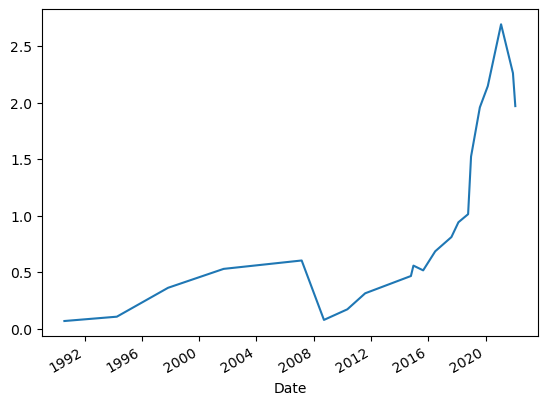

In [10]:
(returns.cumprod()-1).plot()

<Axes: xlabel='Date'>

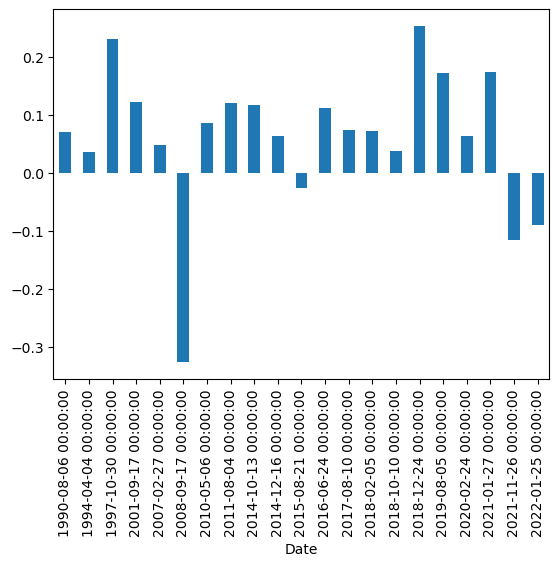

In [11]:
(returns-1).plot(kind='bar')